In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
q_of_a = np.array([0.25, -0.75, 1.5, 0.5, 1.25, -1.5, -0.25, -1, 0.75,  -0.5])

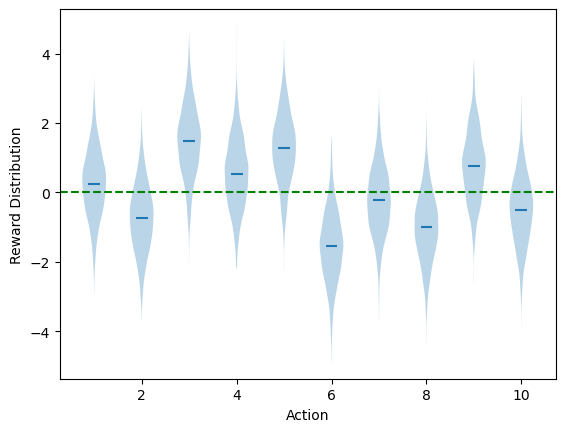

In [2]:
plt.violinplot(np.random.randn(2000,10) + q_of_a,showmeans=True, showextrema=False);
plt.axhline(0,linestyle='--', c= 'g')
plt.xlabel('Action')
plt.ylabel('Reward Distribution')
plt.savefig('figures/Figure2_1.png')
plt.show()

In [3]:
class BanditEnv():
	def __init__(self,rewards):
		self.q_of_a = rewards
		self.a_length = len(rewards)

	def sample_reward(self, action):
		return np.random.randn() + self.q_of_a[action]

def e_greedy_bandit(env, n_steps, epsilon):
	trajectory = []

	Q_of_a = np.zeros(env.a_length)
	N_of_a = np.zeros(env.a_length)

	for _ in range(n_steps):
		rand = np.random.rand()
		if rand < epsilon:

			action = np.random.choice(list(range(env.a_length)))
			reward = env.sample_reward(action)
		else:
			action = np.random.choice(np.where(Q_of_a == Q_of_a.max())[0])
			reward = env.sample_reward(action)
		N_of_a[action] += 1
		Q_of_a[action] += (reward - Q_of_a[action])/N_of_a[action]

		trajectory.append((np.array([action, reward])))
	
	return Q_of_a, N_of_a, np.array(trajectory)


In [4]:
ten_armed_testbed = BanditEnv(q_of_a)

Q_of_a, N_of_a, trajectory = e_greedy_bandit(ten_armed_testbed, 10000, 0.1)
Q_of_a, N_of_a, trajectory[:5]

(array([ 0.0186966 , -0.81450059,  1.48190324,  0.45639581,  1.24633314,
        -1.48060824, -0.29271028, -0.96331412,  0.67402691, -0.46580692]),
 array([ 116.,   97., 5908.,   75., 3277.,  101.,  113.,  112.,  101.,
         100.]),
 array([[ 7.        ,  0.54584249],
        [ 7.        , -2.51900586],
        [ 1.        , -0.83769497],
        [ 6.        ,  0.15481011],
        [ 6.        ,  0.257024  ]]))

In [5]:
def average_over_n_runs(n_runs, env, n_steps, epsilon):
	avg_reward_at_step_t = np.zeros(n_steps)
	q_star = env.q_of_a.argmax()
	optimal_action = np.zeros(n_steps)



	for i in range(1,n_runs + 1):
		_, _, trajectory = e_greedy_bandit(env,n_steps,epsilon)
		avg_reward_at_step_t += trajectory[:,1]
		optimal_action += (trajectory[:,0] == q_star)
	return avg_reward_at_step_t/n_runs, optimal_action/n_runs


In [6]:
hist_01, optimal_01 = average_over_n_runs(2000,ten_armed_testbed, 1000, 0.1)
hist_001, optimal_001 = average_over_n_runs(2000,ten_armed_testbed, 1000, 0.01)
hist_0, optimal_0 = average_over_n_runs(2000, ten_armed_testbed, 1000, 0)

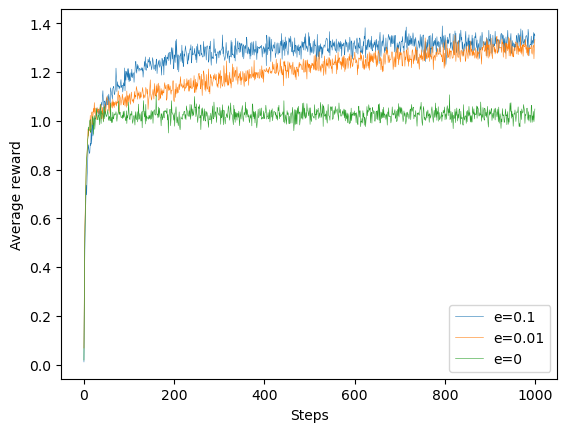

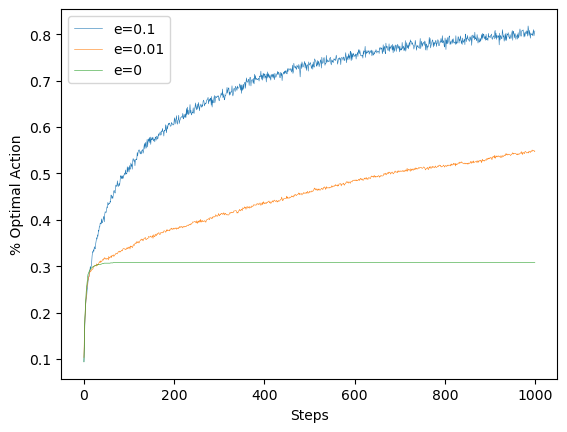

In [7]:
plt.plot(hist_01, linewidth=0.4, label='e=0.1')
plt.plot(hist_001, linewidth=0.4, label='e=0.01')
plt.plot(hist_0, linewidth=0.4, label='e=0')
plt.legend()
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.savefig('figures/Figure2_2a.png')
plt.show()

plt.plot(optimal_01, linewidth=0.4, label='e=0.1')
plt.plot(optimal_001, linewidth=0.4, label='e=0.01')
plt.plot(optimal_0, linewidth=0.4, label='e=0')

plt.legend()
plt.xlabel('Steps')
plt.ylabel('% Optimal Action')
plt.savefig('figures/Figure2_2b.png')
plt.show()

# Exercise 2.5

In [8]:
class NonStationaryBanditEnv():
	def __init__(self,rewards):
		self.q_of_a = rewards
		self.a_length = len(rewards)

	def sample_reward(self, action):
		self.shift_qs()
		return np.random.randn() + q_of_a[action]
	
	def shift_qs(self):
		self.q_of_a += np.random.normal(0,0.1,size=self.q_of_a.shape)

#changing this to include alpha as a constant value
def e_greedy_bandit(env, n_steps, epsilon, alpha = None):
	trajectory = []
	Q_of_a = np.zeros(env.a_length)
	N_of_a = np.zeros(env.a_length)

	for _ in range(n_steps):
		rand = np.random.rand()
		if rand < epsilon:

			action = np.random.choice(list(range(env.a_length)))
			reward = env.sample_reward(action)
		else:
			action = np.random.choice(np.where(Q_of_a == Q_of_a.max())[0])
			reward = env.sample_reward(action)
		N_of_a[action] += 1
		if alpha == None:
			Q_of_a[action] += (reward - Q_of_a[action])/N_of_a[action]
		else:
			Q_of_a[action] += (reward - Q_of_a[action])*alpha

		trajectory.append((np.array([action, reward])))
	
	return Q_of_a, N_of_a, np.array(trajectory)

def average_over_n_runs(n_runs, env, n_steps, epsilon, alpha = None):
	avg_reward_at_step_t = np.zeros(n_steps)
	q_star = env.q_of_a.argmax()
	optimal_action = np.zeros(n_steps)



	for i in range(1,n_runs + 1):
		_, _, trajectory = e_greedy_bandit(env,n_steps,epsilon, alpha)
		avg_reward_at_step_t += trajectory[:,1]
		optimal_action += (trajectory[:,0] == q_star)
	return avg_reward_at_step_t/n_runs, optimal_action/n_runs



In [9]:
hist_1_over_n, optimal_1_over_n = average_over_n_runs(200,ten_armed_testbed, 10000, 0.1) # alpha = 1/n
hist_01, optimal_01 = average_over_n_runs(200,ten_armed_testbed, 10000, 0.1, 0.1) # alpha = 0.1
hist_001, optimal_001 = average_over_n_runs(200, ten_armed_testbed, 10000, 0.1, 0.01) # alpha = 0.01

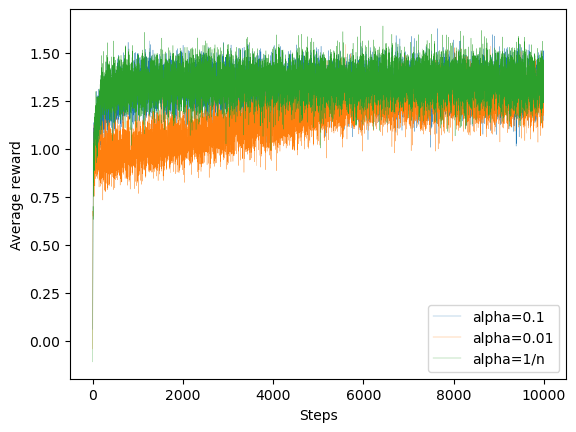

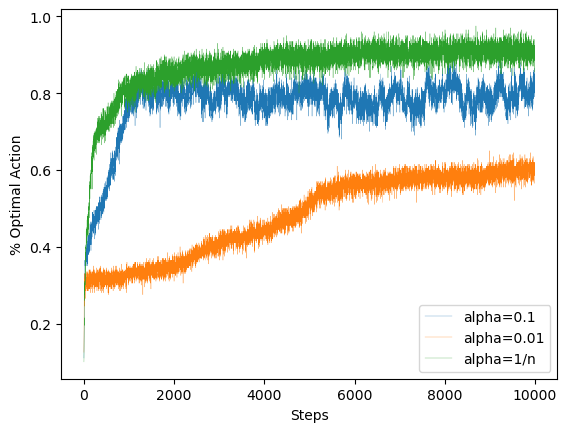

In [10]:
plt.plot(hist_01, linewidth=0.2, label='alpha=0.1')
plt.plot(hist_001, linewidth=0.2, label='alpha=0.01')
plt.plot(hist_1_over_n, linewidth=0.2, label='alpha=1/n')
plt.legend()
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.savefig('figures/exercise2_5a.png')
plt.show()

plt.plot(optimal_01, linewidth=0.2, label='alpha=0.1')
plt.plot(optimal_001, linewidth=0.2, label='alpha=0.01')
plt.plot(optimal_1_over_n, linewidth=0.2, label='alpha=1/n')

plt.legend()
plt.xlabel('Steps')
plt.ylabel('% Optimal Action')
plt.savefig('figures/exercise2_5b.png')
plt.show()

# Optimism

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
q_of_a = np.array([0.25, -0.75, 1.5, 0.5, 1.25, -1.5, -0.25, -1, 0.75,  -0.5])

class BanditEnv():
	def __init__(self,rewards):
		self.q_of_a = rewards
		self.a_length = len(rewards)

	def sample_reward(self, action):
		return np.random.randn() + self.q_of_a[action]

ten_armed_testbed = BanditEnv(q_of_a)

def e_greedy_bandit(env, n_steps, epsilon, Q_init = 0, alpha = None):
	trajectory = []
	Q_of_a = np.zeros(env.a_length) + Q_init
	N_of_a = np.zeros(env.a_length)

	for _ in range(n_steps):
		rand = np.random.rand()
		if rand < epsilon:
			action = np.random.choice(list(range(env.a_length)))
			reward = env.sample_reward(action)
		else:
			
			action = np.random.choice(np.where(Q_of_a == Q_of_a.max())[0])
			reward = env.sample_reward(action)
		N_of_a[action] += 1
		if alpha == None:
			Q_of_a[action] +=(reward - Q_of_a[action])/N_of_a[action]
		else:
			Q_of_a[action] += alpha*(reward-Q_of_a[action])
		

		trajectory.append((np.array([action, reward])))
	
	return Q_of_a, N_of_a, np.array(trajectory)

def average_over_n_runs(n_runs, env, n_steps, epsilon, Q_init=0,alpha = None):
	avg_reward_at_step_t = np.zeros(n_steps)
	q_star = env.q_of_a.argmax()
	optimal_action = np.zeros(n_steps)



	for i in range(1,n_runs + 1):
		_, _, trajectory = e_greedy_bandit(env,n_steps,epsilon, Q_init, alpha)
		avg_reward_at_step_t += trajectory[:,1]
		optimal_action += (trajectory[:,0] == q_star)
	return avg_reward_at_step_t/n_runs, optimal_action/n_runs


In [12]:
hist_optimstic, optimal_optimistic = average_over_n_runs(2000,ten_armed_testbed, 1000, 0, 5, 0.1)
hist_0, optimal_0 = average_over_n_runs(2000,ten_armed_testbed, 1000, 0.1, 0, 0.1)

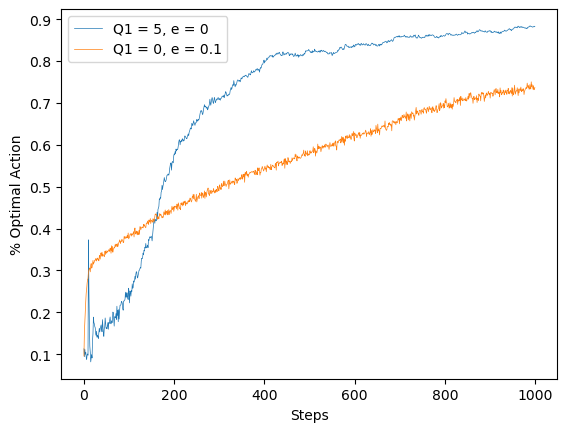

In [13]:
plt.plot(optimal_optimistic, linewidth=0.5, label='Q1 = 5, e = 0')
plt.plot(optimal_0, linewidth=0.5, label='Q1 = 0, e = 0.1')

plt.legend()
plt.xlabel('Steps')
plt.ylabel('% Optimal Action')
plt.savefig('figures/Figure2_3.png')
plt.show()

In [14]:
q, n, traj = e_greedy_bandit(ten_armed_testbed, 1000, 0, 5,0.1)
q

array([0.68798819, 0.7417528 , 1.9986438 , 0.76522363, 0.80978852,
       0.67572034, 0.48915624, 0.74024732, 0.79063459, 0.80578447])

# UCB

In [15]:
def ucb_bandit(env, n_steps, c):
	trajectory = []
	Q_of_a = np.zeros(env.a_length)
	N_of_a = np.zeros(env.a_length)

	for t in range(1,n_steps+1):
		unselected_actions = np.where(N_of_a == 0)[0]
		if t <= env.a_length:
			action = np.random.choice(unselected_actions)
		else:
			action = (Q_of_a + c * np.sqrt(np.log(t)/N_of_a)).argmax()
		reward = env.sample_reward(action)

		N_of_a[action] += 1
		Q_of_a[action] += (reward-Q_of_a[action])/N_of_a[action]

		trajectory.append(np.array([action, reward]))

	return Q_of_a, N_of_a, np.array(trajectory)

def average_over_n_runs_ucb(n_runs, env, n_steps, c):
	avg_reward_at_step_t = np.zeros(n_steps)
	q_star = env.q_of_a.argmax()
	optimal_action = np.zeros(n_steps)



	for i in range(1,n_runs + 1):
		_, _, trajectory = ucb_bandit(env,n_steps,c)
		avg_reward_at_step_t += trajectory[:,1]
		optimal_action += (trajectory[:,0] == q_star)
	return avg_reward_at_step_t/n_runs, optimal_action/n_runs



In [16]:
hist_ucb, optimal_ucb = average_over_n_runs_ucb(2000,ten_armed_testbed,1000, 2)
hist_e, optimal_e = average_over_n_runs(2000,ten_armed_testbed,1000,0.1,0)

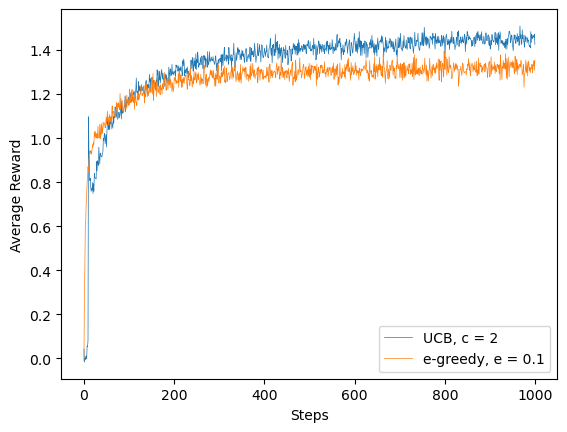

In [17]:
plt.plot(hist_ucb, linewidth=0.5, label='UCB, c = 2')
plt.plot(hist_e, linewidth=0.5, label='e-greedy, e = 0.1')

plt.legend()
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.savefig('figures/Figure2_4.png')
plt.show()

# Gradient Bandit

In [21]:
q_of_a = np.array([0.25, -0.75, 1.5, 0.5, 1.25, -1.5, -0.25, -1, 0.75,  -0.5]) + 4

class BanditEnv():
	def __init__(self,rewards):
		self.q_of_a = rewards
		self.a_length = len(rewards)

	def sample_reward(self, action):
		return np.random.randn() + self.q_of_a[action]
	
	def __call__(self,action):
		return self.sample_reward(action)
		
ten_armed_four_testbed = BanditEnv(q_of_a)

In [53]:
def gradient_bandit(env, n_steps, alpha, baseline=True):
  trajectory = []

  H_of_a = np.zeros(env.a_length)
  actions = np.arange(env.a_length)
  Rbar = 0
  for t in range(1,n_steps+1):
    softmax = np.exp(H_of_a) / np.sum(np.exp(H_of_a))

    action = np.random.choice(actions, p=softmax/sum(softmax))
    reward = env(action)
    if t == 1 and baseline==True:
      Rbar = reward
    elif baseline==False:
      Rbar = 0

      
    H_of_a[action] += alpha*(reward-Rbar)*(1-softmax[action])
    other_actions = np.where(actions != action )[0]
    H_of_a[other_actions] -= alpha*(reward-Rbar)*(softmax[other_actions])

    if baseline== True:
      Rbar += (reward - Rbar)/t
    trajectory.append(np.array([action, reward]))
    
  return H_of_a, actions, np.array(trajectory)
    

def average_over_n_runs_gradient(n_runs, env, n_steps, alpha,baseline=True):
	avg_reward_at_step_t = np.zeros(n_steps)
	q_star = env.q_of_a.argmax()
	optimal_action = np.zeros(n_steps)



	for i in range(1,n_runs + 1):
		_, _, trajectory = gradient_bandit(env,n_steps,alpha, baseline)
		avg_reward_at_step_t += trajectory[:,1]
		optimal_action += (trajectory[:,0] == q_star)
	return avg_reward_at_step_t/n_runs, optimal_action/n_runs


In [56]:
hist_01_base, optimal_01_base = average_over_n_runs_gradient(2000,ten_armed_four_testbed,1000, 0.1,True)
hist_04_base, optimal_04_base = average_over_n_runs_gradient(2000,ten_armed_four_testbed,1000,0.4,True)

hist_01, optimal_01 = average_over_n_runs_gradient(2000,ten_armed_four_testbed,1000,0.1, False)
hist_04, optimal_04 = average_over_n_runs_gradient(2000,ten_armed_four_testbed,1000,0.4, False)


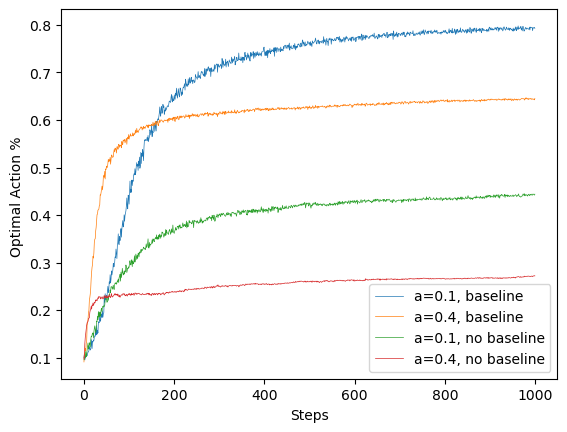

In [57]:
plt.plot(optimal_01_base, linewidth=0.5, label='a=0.1, baseline')
plt.plot(optimal_04_base, linewidth=0.5, label='a=0.4, baseline')

plt.plot(optimal_01, linewidth=0.5, label='a=0.1, no baseline')
plt.plot(optimal_04, linewidth=0.5, label='a=0.4, no baseline')


plt.legend()
plt.xlabel('Steps')
plt.ylabel('Optimal Action % ')
plt.savefig('figures/Figure2_5.png')
plt.show()

# Figure 2.6

### Setting up Environment 

In [71]:
q_of_a = np.array([0.25, -0.75, 1.5, 0.5, 1.25, -1.5, -0.25, -1, 0.75,  -0.5])

class BanditEnv():
	def __init__(self,rewards):
		self.q_of_a = rewards
		self.a_length = len(rewards)

	def sample_reward(self, action):
		return np.random.randn() + self.q_of_a[action]
	
	def __call__(self,action):
		return self.sample_reward(action)
		
ten_armed_testbed = BanditEnv(q_of_a)

### Gradient Bandit

In [72]:
def gradient_bandit(env, n_steps, alpha, baseline=True):
  trajectory = []

  H_of_a = np.zeros(env.a_length)
  actions = np.arange(env.a_length)
  Rbar = 0
  for t in range(1,n_steps+1):
    softmax = np.exp(H_of_a) / np.sum(np.exp(H_of_a))

    action = np.random.choice(actions, p=softmax/sum(softmax))
    reward = env(action)
    if t == 1 and baseline==True:
      Rbar = reward
    elif baseline==False:
      Rbar = 0

      
    H_of_a[action] += alpha*(reward-Rbar)*(1-softmax[action])
    other_actions = np.where(actions != action )[0]
    H_of_a[other_actions] -= alpha*(reward-Rbar)*(softmax[other_actions])

    if baseline== True:
      Rbar += (reward - Rbar)/t
    trajectory.append(np.array([action, reward]))
    
  return H_of_a, actions, np.array(trajectory)


### UCB Bandit

In [73]:
def ucb_bandit(env, n_steps, c):
	trajectory = []
	Q_of_a = np.zeros(env.a_length)
	N_of_a = np.zeros(env.a_length)

	for t in range(1,n_steps+1):
		unselected_actions = np.where(N_of_a == 0)[0]
		if t <= env.a_length:
			action = np.random.choice(unselected_actions)
		else:
			action = (Q_of_a + c * np.sqrt(np.log(t)/N_of_a)).argmax()
		reward = env.sample_reward(action)

		N_of_a[action] += 1
		Q_of_a[action] += (reward-Q_of_a[action])/N_of_a[action]

		trajectory.append(np.array([action, reward]))

	return Q_of_a, N_of_a, np.array(trajectory)

### Optimistic Bandit

In [74]:
def optimistic_greedy_bandit(env, n_steps, Q_init = 0, alpha = 0.1, epsilon = 0):
	trajectory = []
	Q_of_a = np.zeros(env.a_length) + Q_init
	N_of_a = np.zeros(env.a_length)

	for _ in range(n_steps):
		rand = np.random.rand()
		if rand < epsilon:
			action = np.random.choice(list(range(env.a_length)))
			reward = env.sample_reward(action)
		else:
			
			action = np.random.choice(np.where(Q_of_a == Q_of_a.max())[0])
			reward = env.sample_reward(action)
		N_of_a[action] += 1
		if alpha == None:
			Q_of_a[action] +=(reward - Q_of_a[action])/N_of_a[action]
		else:
			Q_of_a[action] += alpha*(reward-Q_of_a[action])
		

		trajectory.append((np.array([action, reward])))
	
	return Q_of_a, N_of_a, np.array(trajectory)

### e-greedy

In [75]:
def e_greedy_bandit(env, n_steps, epsilon):
	trajectory = []

	Q_of_a = np.zeros(env.a_length)
	N_of_a = np.zeros(env.a_length)

	for _ in range(n_steps):
		rand = np.random.rand()
		if rand < epsilon:

			action = np.random.choice(list(range(env.a_length)))
			reward = env.sample_reward(action)
		else:
			action = np.random.choice(np.where(Q_of_a == Q_of_a.max())[0])
			reward = env.sample_reward(action)
		N_of_a[action] += 1
		Q_of_a[action] += (reward - Q_of_a[action])/N_of_a[action]

		trajectory.append((np.array([action, reward])))
	
	return Q_of_a, N_of_a, np.array(trajectory)


### Getting Average Reward

In [77]:
def total_average_over_n_runs(bandit, n_runs, env, n_steps, changing_val):
	avg_reward_at_step_t = np.zeros(n_steps)
	q_star = env.q_of_a.argmax()
	optimal_action = np.zeros(n_steps)



	for i in range(1,n_runs + 1):
		_, _, trajectory = bandit(env,n_steps,changing_val)
		avg_reward_at_step_t += trajectory[:,1]
		optimal_action += (trajectory[:,0] == q_star)
	return np.average(avg_reward_at_step_t/n_runs), np.average(optimal_action/n_runs)


In [89]:
ucb_range = [1/16,1/8,1/4,1/2,1,2,4]
ucb_vals = []
e_range = [1/128,1/64,1/32,1/16,1/8,1/4]
e_vals = []
optimistic_range = [1/4,1/2,1,2,4]
optimistic_vals = []
gradient_range = [1/32,1/16,1/8,1/4,1/2,1,2]
gradient_vals = []

for param in ucb_range:
  ucb_vals.append(total_average_over_n_runs(ucb_bandit,100,ten_armed_testbed,1000,param)[0])

for param in e_range:
  e_vals.append(total_average_over_n_runs(e_greedy_bandit,100,ten_armed_testbed,1000,param)[0])

for param in optimistic_range:
  optimistic_vals.append(total_average_over_n_runs(optimistic_greedy_bandit,100,ten_armed_testbed,1000,param)[0])

for param in gradient_range:
  gradient_vals.append(total_average_over_n_runs(gradient_bandit,100,ten_armed_testbed,1000,param)[0])


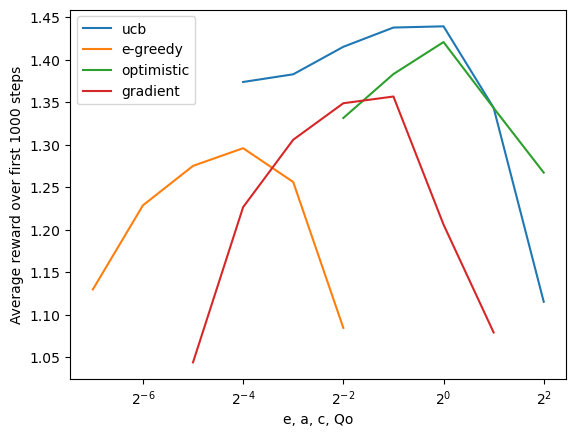

In [91]:
plt.plot(ucb_range,ucb_vals, label='ucb')
plt.plot(e_range, e_vals, label='e-greedy')
plt.plot(optimistic_range, optimistic_vals, label='optimistic')
plt.plot(gradient_range,gradient_vals, label='gradient')

plt.xscale('log',base=2)
plt.legend()

plt.xlabel('e, a, c, Qo')
plt.ylabel('Average reward over first 1000 steps')

plt.savefig('figures/Figure2_6.png')
plt.show()

# Exercise 2.11

In [94]:
np.random.seed(42)
class NonStationaryBanditEnv():
    def __init__(self,rewards):
      self.q_of_a = rewards
      self.a_length = len(rewards)

    def sample_reward(self, action):
      self.shift_qs()
      return np.random.randn() + q_of_a[action]
    
    def shift_qs(self):
      self.q_of_a += np.random.normal(0,0.1,size=self.q_of_a.shape)

    def __call__(self,action):
      return self.sample_reward(action) 

          
    
q_of_a = np.array([0.25, -0.75, 1.5, 0.5, 1.25, -1.5, -0.25, -1, 0.75,  -0.5])
          
ten_armed_testbed_ns = NonStationaryBanditEnv(q_of_a)
ucb_range = [1/16,1/8,1/4,1/2,1,2,4]
ucb_vals = []
e_range = [1/128,1/64,1/32,1/16,1/8,1/4]
e_vals = []
optimistic_range = [1/4,1/2,1,2,4]
optimistic_vals = []
gradient_range = [1/32,1/16,1/8,1/4,1/2,1,2]
gradient_vals = []

np.random.seed(42)
for param in ucb_range:
  ucb_vals.append(total_average_over_n_runs(ucb_bandit,10,ten_armed_testbed_ns,100000,param)[0])

print(f'Finished UCB')
np.random.seed(42)
for param in e_range:
  e_vals.append(total_average_over_n_runs(e_greedy_bandit,10,ten_armed_testbed_ns,100000,param)[0])

print(f'Finished E-greedy')
np.random.seed(42)
for param in optimistic_range:
  optimistic_vals.append(total_average_over_n_runs(optimistic_greedy_bandit,10,ten_armed_testbed_ns,100000,param)[0])

print(f'Finished Optimistic')
np.random.seed(42)
for param in gradient_range:
  gradient_vals.append(total_average_over_n_runs(gradient_bandit,100,ten_armed_testbed_ns,100000,param)[0])

print(f'Finished')


Finished UCB
Finished E-greedy
Finished Optimistic


KeyboardInterrupt: 

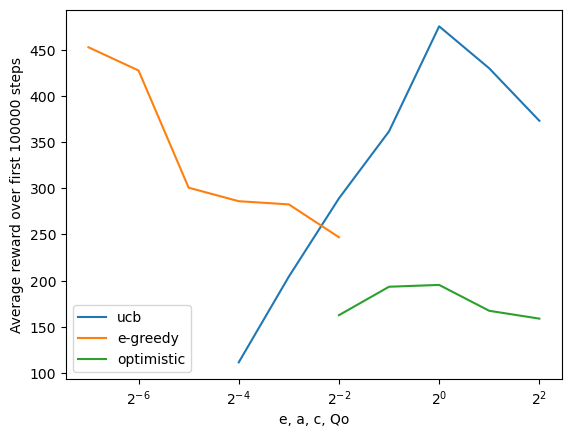

In [95]:
plt.plot(ucb_range,ucb_vals, label='ucb')
plt.plot(e_range, e_vals, label='e-greedy')
plt.plot(optimistic_range, optimistic_vals, label='optimistic')
# plt.plot(gradient_range,gradient_vals, label='gradient')

plt.xscale('log',base=2)
plt.legend()

plt.xlabel('e, a, c, Qo')
plt.ylabel('Average reward over first 100000 steps')

plt.savefig('figures/Exercise2.11.png')
plt.show()